In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [ ]:
data = pd.read_csv(r"tripadvisor_hotel_reviews.csv")
df = pd.DataFrame(data)
df.head()

,review,rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [ ]:
# Clean text function
def clean_text(text):
    return re.sub('[^a-zA-Z]', ' ', text).lower()

df['cleaned_text'] = df['review'].apply(clean_text)
df['label'] = df['rating'].map({1.0:0, 2.0:0, 3.0:1, 4.0:1, 5.0:1})

In [ ]:
# Count punctuation percentage
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

df['review_len'] = df['review'].apply(lambda x: len(x) - x.count(" "))
df['punct'] = df['review'].apply(count_punct)
df.head()

,review,rating,cleaned_text,label,review_len,punct
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...,1,505,2.4
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...,0,1438,1.8
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not experience hotel monaco seat...,1,1209,2.6
3,"unique, great stay, wonderful time hotel monac...",5,unique great stay wonderful time hotel monac...,1,510,3.1
4,"great stay great stay, went seahawk game aweso...",5,great stay great stay went seahawk game aweso...,1,1089,3.7


In [ ]:
# Tokenize text
def tokenize_text(text):
    tokenized_text = text.split()
    return tokenized_text

df['cleaned_text'] = df['cleaned_text'].apply(tokenize_text)
df.head()

,review,rating,cleaned_text,label,review_len,punct
0,nice hotel expensive parking got good deal sta...,4,"[nice, hotel, expensive, parking, got, good, d...",1,505,2.4
1,ok nothing special charge diamond member hilto...,2,"[ok, nothing, special, charge, diamond, member...",0,1438,1.8
2,nice rooms not 4* experience hotel monaco seat...,3,"[nice, rooms, not, experience, hotel, monaco, ...",1,1209,2.6
3,"unique, great stay, wonderful time hotel monac...",5,"[unique, great, stay, wonderful, time, hotel, ...",1,510,3.1
4,"great stay great stay, went seahawk game aweso...",5,"[great, stay, great, stay, went, seahawk, game...",1,1089,3.7


In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...


True

In [ ]:
# Lemmatize text
def lemmatize_text(token_list):
    lemmatizer = WordNetLemmatizer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    return " ".join([lemmatizer.lemmatize(token) for token in token_list if not token in set(all_stopwords)])

df['lemmatized_review'] = df['cleaned_text'].apply(lemmatize_text)
df.head()

,review,rating,cleaned_text,label,review_len,punct,lemmatized_review
0,nice hotel expensive parking got good deal sta...,4,"[nice, hotel, expensive, parking, got, good, d...",1,505,2.4,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,"[ok, nothing, special, charge, diamond, member...",0,1438,1.8,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,"[nice, rooms, not, experience, hotel, monaco, ...",1,1209,2.6,nice room not experience hotel monaco seattle ...
3,"unique, great stay, wonderful time hotel monac...",5,"[unique, great, stay, wonderful, time, hotel, ...",1,510,3.1,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5,"[great, stay, great, stay, went, seahawk, game...",1,1089,3.7,great stay great stay went seahawk game awesom...


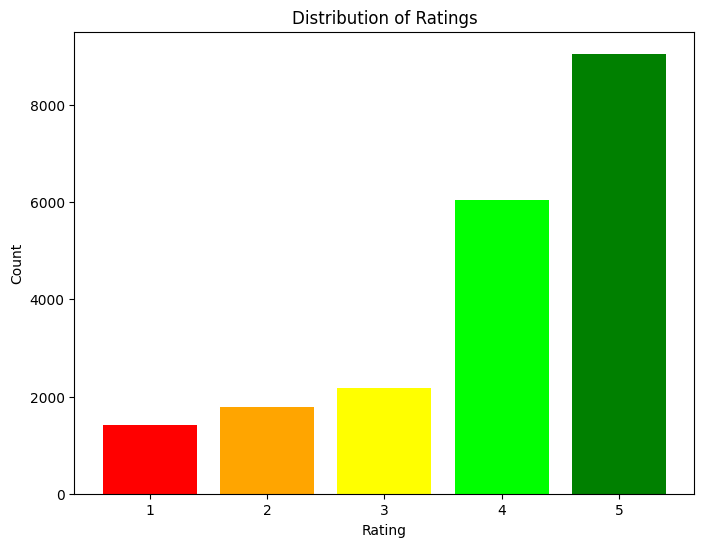

Number of null in label: 0
Number of null in text: 0


In [ ]:
# Menghitung jumlah data per rating
rating_counts = df['rating'].value_counts().sort_index()

# Plot bar chart menggunakan matplotlib
plt.figure(figsize=(8, 6))
plt.bar(rating_counts.index, rating_counts.values, color=['red', 'orange', 'yellow', 'lime', 'green'])
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.xticks(rating_counts.index)
plt.show()

# Jumlah null values di kolom rating dan review
null_rating = df['rating'].isnull().sum()
null_review = df['review'].isnull().sum()
print(f"Number of null in label: {null_rating}")
print(f"Number of null in text: {null_review}")

In [ ]:
df_negative = df[ (df['rating']==1.0) | (df['rating']==2.0)]
df_positive = df[ (df['rating']==3.0) | (df['rating']==4.0) | (df['rating']==5.0)]

#convert to list
negative_list=df_negative['lemmatized_review'].tolist()
positive_list= df_positive['lemmatized_review'].tolist()

filtered_negative = ("").join(str(negative_list)) #convert the list into a string of spam
filtered_negative = filtered_negative.lower()

filtered_positive = ("").join(str(positive_list)) #convert the list into a string of ham
filtered_positive = filtered_positive.lower()

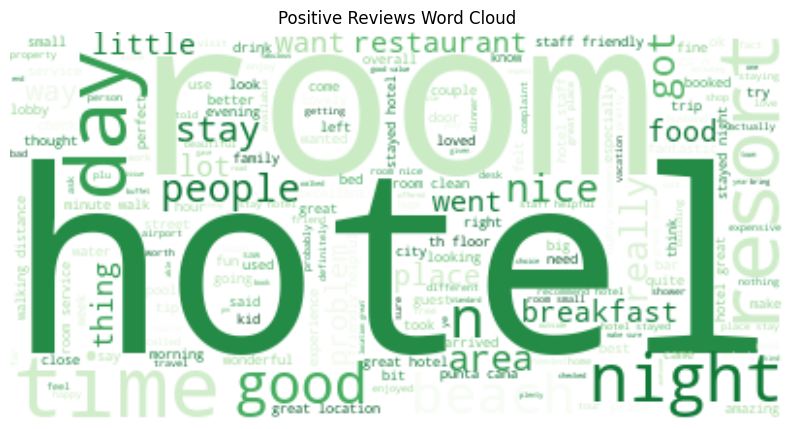

In [ ]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Greens").generate(filtered_positive)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Positive Reviews Word Cloud")
plt.show()

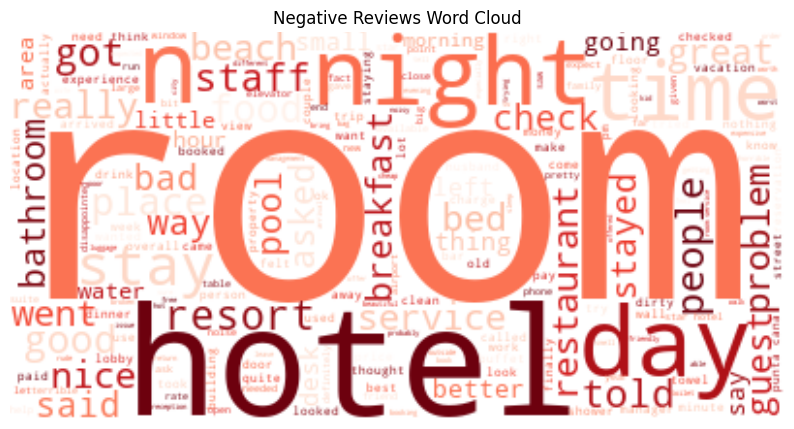

In [ ]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_negative)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negative Reviews Word Cloud")
plt.show()

In [ ]:
# Split data into features and target
X = df[['lemmatized_review', 'review_len', 'punct']]
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Vectorization using TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['lemmatized_review'])
X_test_tfidf = tfidf_vectorizer.transform(X_test['lemmatized_review'])

In [ ]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=1000, random_state=0)
X_train_pca = pca.fit_transform(X_train_tfidf.toarray())
X_test_pca = pca.transform(X_test_tfidf.toarray())

In [ ]:
# Combine text features with numerical features
X_train_numerical = X_train[['review_len', 'punct']].reset_index(drop=True)
X_train_vect = pd.concat([X_train_numerical, pd.DataFrame(X_train_pca)], axis=1)

X_test_numerical = X_test[['review_len', 'punct']].reset_index(drop=True)
X_test_vect = pd.concat([X_test_numerical, pd.DataFrame(X_test_pca)], axis=1)

In [ ]:
# Fill NaN values (if any)
X_train_vect = X_train_vect.fillna(0)
X_test_vect = X_test_vect.fillna(0)

# Convert feature names to string
X_train_vect.columns = X_train_vect.columns.astype(str)
X_test_vect.columns = X_test_vect.columns.astype(str)

In [ ]:
# Apply SMOTE for oversampling
smote = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vect, y_train)

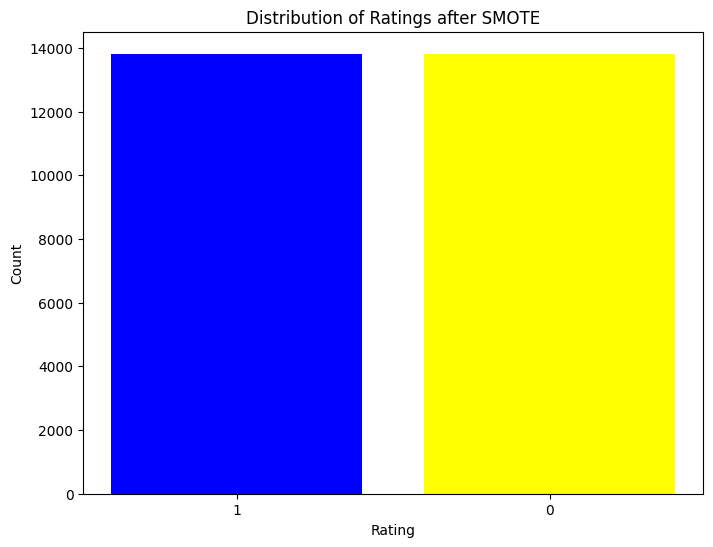

In [ ]:
# Visualisasi rating setelah SMOTE
rating_counts_resampled = pd.Series(y_train_resampled).value_counts().reset_index()
rating_counts_resampled.columns = ['label', 'count']

# Plot bar chart menggunakan matplotlib
plt.figure(figsize=(8, 6))
plt.bar(rating_counts_resampled['label'], rating_counts_resampled['count'],
        color=[ 'yellow', 'blue'])
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings after SMOTE')
plt.xticks(rating_counts_resampled['label'], ['0', '1'])  # Memberi label untuk sumbu x
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression model
lr_model = LogisticRegression(random_state=0)
lr_model.fit(X_train_resampled, y_train_resampled)

C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(random_state=0)

In [ ]:
from sklearn.metrics import classification_report

# Predict with Logistic Regression
y_pred_lr = lr_model.predict(X_test_vect)
acc_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy of Logistic Regression: {:.2f}".format(acc_lr*100))

f1_lr = f1_score(y_test, y_pred_lr)
print("F1 of Logistic Regression: {:.2f}".format(f1_lr*100))

cslr = classification_report(y_test, y_pred_lr)
print(f"Confusion Matrix for Logistic Regression:\n{cslr}\n")

Accuracy of Logistic Regression: 90.34
F1 of Logistic Regression: 94.05
Confusion Matrix for Logistic Regression:
              precision    recall  f1-score   support

           0       0.64      0.89      0.74       640
           1       0.98      0.91      0.94      3459

    accuracy                           0.90      4099
   macro avg       0.81      0.90      0.84      4099
weighted avg       0.92      0.90      0.91      4099




In [ ]:
model = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000)
}

In [ ]:
import pickle

filename = 'modellr.sav'
pickle.dump(lr_model, open(filename, 'wb'))

with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

with open('PCA.pkl', 'wb') as f:
    pickle.dump(pca, f)